In [1]:
import numpy as np
import os
import tifffile as tf
from utils.compute_accuracy_map_svm import *
from utils.projection_3d import *
# label
stim = np.array([3,1,2,3,2,1,3,1,2,1,2,3,1,2,3,2,3,1,3,2,1,2,3,1,2,3,1,2,1,3,2,3,1,2,3,1,3,1,2,3,1,2,3,2,1,2,1,3,2,1,3,1,2,3,1,2,3,2,1,3,1,2,3,2,1,3,1,3,2,3,2,1,3,2,1,3,1,2,3,2,1,3,1,2,3,2,1,2,3,1,
                 3,1,2,3,1,2,3,2,1,2,3,1,2,1,3,2,1,3,1,3,2,3,1,2,1,2,3,2,3,1,2,3,1,3,2,1,2,3,1,2,1,3,1,2,3,2,3,1,2,1,3,1,3,2,3,1,2,1,2,3,2,1,3,1,2,3,2,3,1,3,1,2,1,3,2,1,3,2,3,1,2,3,2,1,2,1,3,1,2,3])

In [2]:
## Ach
file_folder_list_1 = ['20230417-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly2/data',
                        '20230420-nsyb-G7f-rAch1h/fly3/data',
                        '20230428-nsyb-G7f-rAch1h/fly1/data',
                        '20230507-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly1/data',
                        '20230510-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly2/data',
                        '20230511-nsyb-G7f-rAch1h/fly3/data',
                        '20230515-nsyb-G7f-rAch1h/fly1/data']
file_folder_list_2 = ['20230417-fly2', '20230420-fly2', '20230420-fly3', '20230428-fly1', 
                 '20230507-fly1', '20230510-fly1', '20230510-fly2', '20230511-fly2', '20230511-fly3', '20230515-fly1']
# ## 5HT
# file_folder_list_1 = ['20230429-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230506-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230513-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly2/data',
#                         '20230516-nsyb-G7f-r5HT1.0/fly4/data',
#                         '20230517-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly1/data',
#                         '20230601-nsyb-G7f-r5HT1.0/fly3/data',
#                         '20230603-nsyb-G7f-r5HT1.0/fly1/data']
# file_folder_list_2 = ['20230429-r5HT1.0-fly1', '20230506-r5HT1.0-fly1', '20230513-r5HT1.0-fly1', '20230513-r5HT1.0-fly2', 
#                 '20230516-r5HT1.0-fly2', '20230516-r5HT1.0-fly4', '20230517-r5HT1.0-fly1', '20230601-r5HT1.0-fly1', 
#                 '20230601-r5HT1.0-fly3', '20230603-r5HT1.0-fly1']

In [3]:
## read data
data_path = '../../../results/3.odor_random_90_times_OCT_MCH_EA_new/nsyb-G7f-rAch1h'
atlas_path = data_path
result_path = '../results/Ach-final-test'
file_name = ['dff0_0-80_down2_C2','dff0_0-80_down2_C3']
atlas_name = 'align_to_atlas/Transformed_atlas.tif'
atlas_eroded_name = 'align_to_atlas/Transformed_atlas_eroded_r5.tif'
num_fly = len(file_folder_list_1)
atlas_z_range = range(13,38)
num_channel = 2

# cv fold
cv_fold = 5
# svm win
win_x = 4
win_y = 4
win_z = 2
size_x = 256
size_y = 256
size_z = 25
map_size_x = int(np.ceil(size_x/win_x))
map_size_y = int(np.ceil(size_y/win_y))
map_size_z = int(np.ceil(size_z/win_z))
kf_random_state = 5
kf_ifshuffle = True
# channel
list_channel_selected = [0,1,2]
num_channel_selected = len(list_channel_selected)
# pca_variance_threshold
pca_variance_threshold = 0.9
# list_odor_choice
list_odor_choice = [0]
num_odor_choice = len(list_odor_choice)

## parameters for PCA and SVM
pca_svm_tp_range = range(1,15)


20230420-nsyb-G7f-rAch1h/fly2/data
load data done! size:
(256, 256, 25, 14, 180, 2)
load atlas done! size:
(256, 256, 25)
fly 1,channel 0,odor choice 0
Accuracy:


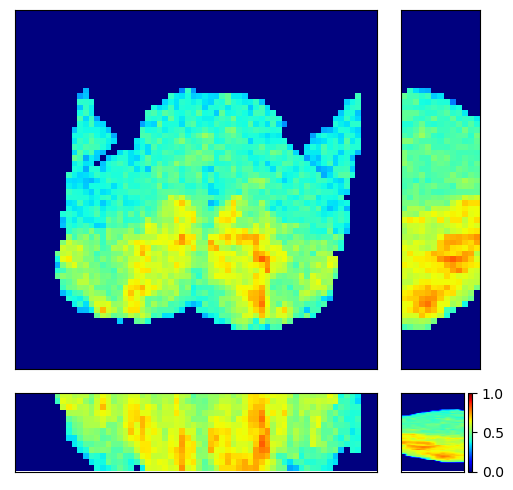

auc_weighted:


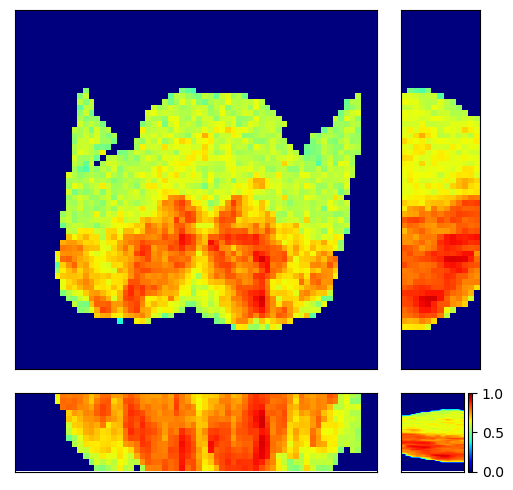

fly 1,channel 1,odor choice 0
Accuracy:


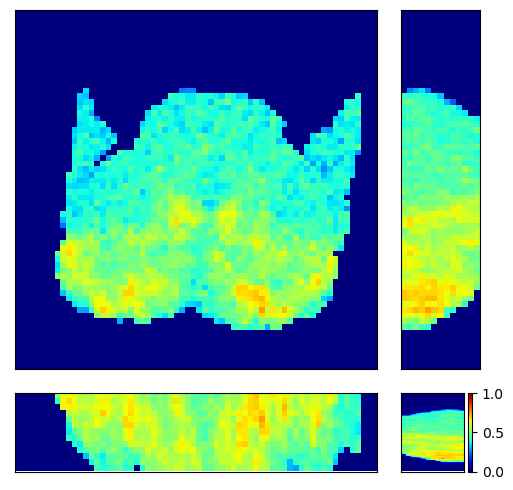

auc_weighted:


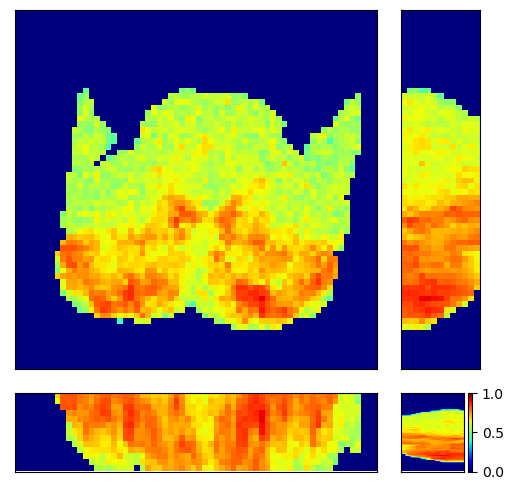

fly 1,channel 2,odor choice 0
Accuracy:


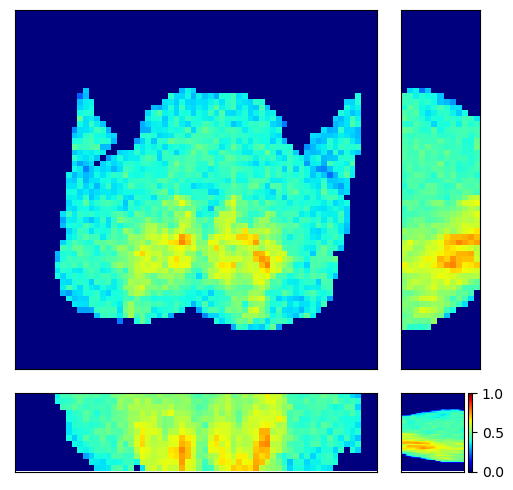

auc_weighted:


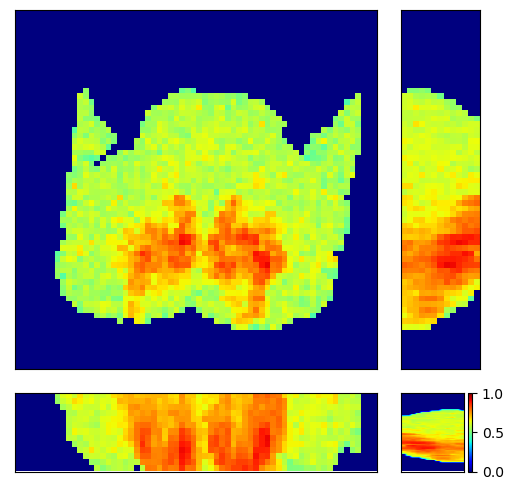

In [4]:
for i in [1]:
    list_list_acc = np.zeros((num_channel_selected,num_odor_choice,map_size_x,map_size_y,map_size_z))
    list_list_auc_weighted = np.zeros((num_channel_selected,num_odor_choice,map_size_x,map_size_y,map_size_z))
    # load data
    file_folder_1 = file_folder_list_1[i]
    print(file_folder_1)
    path_file_0 = data_path + '/' + file_folder_1 + '/' + file_name[0] + '.npy'
    path_file_1 = data_path + '/' + file_folder_1 + '/' + file_name[1] + '.npy'
    data_1 = np.load(path_file_0)
    data_1 = np.transpose(data_1,[3,4,2,1,0])
    # pca_svm_tp_range
    data_1 = data_1[:,:,:,pca_svm_tp_range,:]
    data_2 = np.load(path_file_1)
    data_2 = np.transpose(data_2,[3,4,2,1,0])
    # pca_svm_tp_range
    data_2 = data_2[:,:,:,pca_svm_tp_range,:]
    size_x = np.size(data_1,0)
    size_y = np.size(data_1,1)
    size_z = np.size(data_1,2)
    num_tp = np.size(data_1,3)
    num_trial = np.size(data_1,4)
    data = np.concatenate((data_1,data_2),axis = 4)
    del data_1,data_2
    data = data.reshape(size_x,size_y,size_z,num_tp,num_trial,num_channel,order = 'F')
    print('load data done! size:')
    print(np.shape(data))
    file_folder_2 = file_folder_1[:-5]
    # load atlas
    atlas= tf.imread(atlas_path + '/' + file_folder_2 + '/' + atlas_name)
    atlas = np.transpose(atlas,[1,2,0])
    atlas = atlas[:,:,atlas_z_range]
    print('load atlas done! size:')
    print(np.shape(atlas))
    

    for j,channel_selected in enumerate(list_channel_selected):
        for k , odor_choice in enumerate(list_odor_choice):
            print('fly '+str(i)+',channel '+ str(j)+',odor choice '+str(k))
            [acc,auc_weighted] = compute_accuracy_map_svm(data,stim,odor_choice,atlas>0,channel_selected,win_x,win_y,win_z,cv_fold,kf_random_state,
                                                                                                        kf_ifshuffle,method_choice = 1,pca_variance_threshold = pca_variance_threshold)
            print('Accuracy:')
            projection_3d(acc,458,458,100,30,'jet',[0,1],0,True,False,[])
            # print('precision_weighted:')
            # projection_3d(precision_weighted,458,458,100,30,'jet',[0,1],0,True,False,[])
            # print('recall_weightedy:')
            # projection_3d(recall_weighted,458,458,100,30,'jet',[0,1],0,True,False,[])
            # print('f1_weighted:')
            # projection_3d(f1_weighted,458,458,100,30,'jet',[0,1],0,True,False,[])
            print('auc_weighted:')
            projection_3d(auc_weighted,458,458,100,30,'jet',[0,1],0,True,False,[])

            list_list_acc[j,k,:,:,:] = np.array(acc)
            # list_list_precision_weighted[i,j,k,:,:,:]  = np.array(precision_weighted)
            # list_list_recall_weighted[i,j,k,:,:,:]  = np.array(recall_weighted)
            # list_list_f1_weighted[i,j,k,:,:,:]  = np.array(f1_weighted)
            list_list_auc_weighted[j,k,:,:,:]  = np.array(auc_weighted)

    final_result_path = os.path.abspath(result_path + '/' + file_folder_list_2[i] + '/' + 'Accuracy_map_DEEPCAD_formal')
    folder = os.path.exists(final_result_path)
    if not folder:
        os.makedirs(final_result_path)
    np.save(final_result_path+'/'+'acc.npy',list_list_acc)
    # np.save(final_result_path+'/'+'precision_weighted.npy',np.squeeze(list_list_precision_weighted[i,:,:,:,:,:]))
    # np.save(final_result_path+'/'+'recall_weighted.npy',np.squeeze(list_list_recall_weighted[i,:,:,:,:,:]))
    # np.save(final_result_path+'/'+'f1_weighted.npy',np.squeeze(list_list_f1_weighted[i,:,:,:,:,:]))
    np.save(final_result_path+'/'+'auc_weighted.npy',list_list_auc_weighted)

